In [1]:
import random

import pygame
import pymunk
from pymunk import Vec2d as Vector2
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

from etc import PerlinNoiseFactory, mibun

pygame.init()

pygame 2.0.1 (SDL 2.0.14, Python 3.8.3)
Hello from the pygame community. https://www.pygame.org/contribute.html


(7, 0)

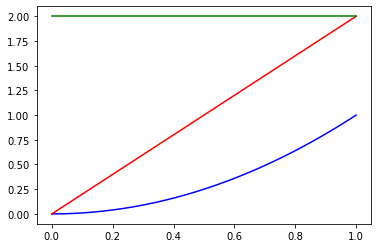

In [2]:
D = np.linspace(0, 1, 1000)
plt.plot(D, D**2, 'b')
plt.plot(D, 2*D, 'r')
plt.plot(D, [2]*len(D), 'g')
plt.show()


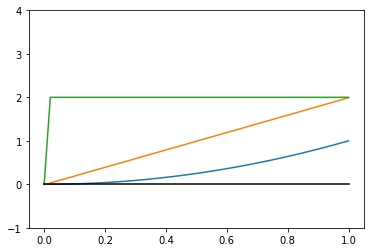

In [3]:
plt.ylim(-1, 4)

D = np.linspace(0, 1, 100)
F = np.array([d**2 for d in D])
FF = mibun(F, D)
FFF = mibun(FF, D)
plt.plot(D, F)
plt.plot(D, FF)
plt.plot(D, FFF)
plt.plot(D, [0]*len(D), c='black')

plt.show()

In [4]:
pf = PerlinNoiseFactory(1, 4, )

D = np.linspace(0, 1, 500)
W = np.array([np.sin(3*d) for d in D])
WW = mibun(W, D)
WWW = mibun(WW, D)

AC = np.zeros((500,)) # 시간도함수
K = 0.000001# 상수

TARGET_FPS = 30
clock = pygame.time.Clock()

surface: pygame.Surface = pygame.display.set_mode((500, 500))

isExit = False

fc = 0
while not isExit:
    surface.fill((255, 255, 255))
    pygame.draw.line(surface, (0, 0, 0), (0, 250), (499, 250))

    # 원함수
    for i, v in enumerate(W):
        pygame.draw.circle(surface, (255, 0, 0), (i, 250-int(v*125)), 1)

    # 도함수
    for i, v in enumerate(WW):
        pygame.draw.circle(surface, (0, 255, 0), (i, 250-int(v*40)), 1)

    # 2계 도함수
    for i, v in enumerate(WWW):
        pygame.draw.circle(surface, (0, 0, 255), (i, 250-int(v* 3)), 1)
    # 업데이트

    AC = K * np.array(WWW)
    W = W + AC
    WW = mibun(W, D)
    WWW = mibun(WW, D)

    for event in pygame.event.get(pygame.QUIT):
        print("end")
        isExit = True
    if fc == 200:
        isExit = True

    fc += 1
    clock.tick(TARGET_FPS)
    pygame.image.save(surface, f"./img/{fc}.png")
    pygame.display.flip()
pygame.quit()

0.0
0.0014969909819802253
-5.4107727506606647e-08
-1.0821349932683558e-07
-1.6231535984278353e-07
-2.1641135357859338e-07
-2.704995252740254e-07
-3.2457791994672595e-07
-3.7864458296934695e-07
-4.3269756013691016e-07
-4.867348977499065e-07
-5.407546426521961e-07
-5.947548423462297e-07
-6.487335450285136e-07
-7.026887996773646e-07
-7.566186561082975e-07
-8.105211650726566e-07
-8.643943783016925e-07
-9.182363485688562e-07
-9.72045129813864e-07
-1.0258187771456166e-06
-1.07955534693901e-06
-1.1332528969430725e-06
-1.1869094862854324e-06
-1.2405231755939424e-06
-1.2940920270073141e-06
-1.3476141043655122e-06
-1.4010874731020135e-06
-1.4545102004988952e-06
-1.5078803555830975e-06
-1.561196009375995e-06
-1.614455234776126e-06
-1.6676561067836704e-06
-1.7207967025018308e-06
-1.7738751011651414e-06
-1.8268893843396006e-06
-1.8798376357972526e-06
-1.9327179418217112e-06
-1.985528391054718e-06
-2.0382670746943466e-06
-2.0909320865684166e-06
-2.143521523092378e-06
-2.1960334834995663e-06
-2.24846

TypeError: center argument must be a pair of numbers